In [2]:
import tensorflow as tf

tf.__version__

'2.3.1'

In [10]:
mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_train, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2649 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1072 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0721 - accuracy: 0.9777


In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Please provide data which shares the same first dimension.

In [13]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [14]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [16]:
predictions = new_model.predict([x_test])

print(predictions)

[[1.33447142e-10 1.61520211e-06 3.06754022e-09 ... 1.24084011e-07
  2.61067470e-11 7.38139875e-07]
 [9.99955654e-01 1.42921524e-08 3.79906778e-05 ... 3.36806380e-07
  7.98060427e-08 5.29346835e-06]
 [5.06143571e-09 2.97035585e-05 2.48012075e-04 ... 5.05754782e-04
  1.20059809e-07 1.57488194e-05]
 ...
 [2.20794032e-13 1.71752251e-10 5.28043151e-14 ... 3.95862081e-13
  1.86618526e-10 2.05326014e-08]
 [1.89802904e-05 9.31839713e-06 2.78916764e-06 ... 1.07204279e-07
  1.16265101e-05 1.05396595e-07]
 [2.15638963e-07 1.33987994e-08 6.04541810e-06 ... 4.23533038e-07
  9.99897599e-01 1.67122271e-05]]


In [17]:
import numpy as np

print(np.argmax(predictions[0]))

5


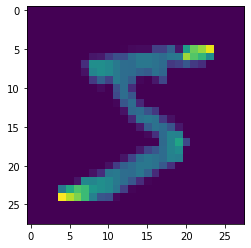

In [18]:
plt.imshow(x_test[0])
plt.show()